In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

### Load and filter the medal data for post WWII Summer Olympic Games

In [2]:
# File to Load
# Source: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
olympic_csv = "resources/athlete_events.csv"

# Read .csv File and store into Pandas data frame
olympic_raw_df = pd.read_csv(olympic_csv)
olympic_raw_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Filter for games after WWII
post_war_df = olympic_raw_df[olympic_raw_df["Year"] >= 1948]

In [4]:
# Filter for winter and summer games
summer_post_war_df = post_war_df[post_war_df.Season == "Summer"]
winter_post_war_df = post_war_df[post_war_df["Season"] == "Winter"]

In [5]:
# Create data frames consisting only of medal winnners.
summer_medal_winners_post_war_df = summer_post_war_df[(summer_post_war_df["Medal"] == "Gold") |\
                                                      (summer_post_war_df["Medal"] == "Silver") |\
                                                      (summer_post_war_df["Medal"] == "Bronze")
                                                     ]

In [6]:
# Find a list of host cities and countries.
# Source: https://www.downloadexcelfiles.com/wo_en/download-excel-file-list-olympic-host-cities#.XjW0N2hKhPY
host_cities_df = pd.read_csv("resources/list-host-cities-olympic-943j.csv")
host_cities_df.head()

,City,Country,Continent,Summer (Olympiad),Winter,Year,Opening Ceremony,Closing Ceremony
0,Athens,Greece,Europe,I,-,1896.0,April 6,April 15
1,Paris,France,Europe,II,-,1900.0,May 14,October 28
2,St. Louis,United States,North America,III,-,1904.0,July 1,November 23
3,London,United Kingdom,Europe,IV,-,1908.0,April 27,October 31
4,Stockholm,Sweden,Europe,V,-,1912.0,May 5,July 22


### Question: What countries field the largest teams?

In [7]:
# Find the mean size of each summer games team fielded by a country post war.
summer_post_war_athlete_count = summer_post_war_df.groupby(["NOC", "Year"]).count()
summer_mean_team_size = summer_post_war_athlete_count["ID"].mean(level=0)
summer_mean_team_size.head()

NOC
AFG     8.461538
AHO     5.692308
ALB     7.875000
ALG    41.461538
AND     4.818182
Name: ID, dtype: float64

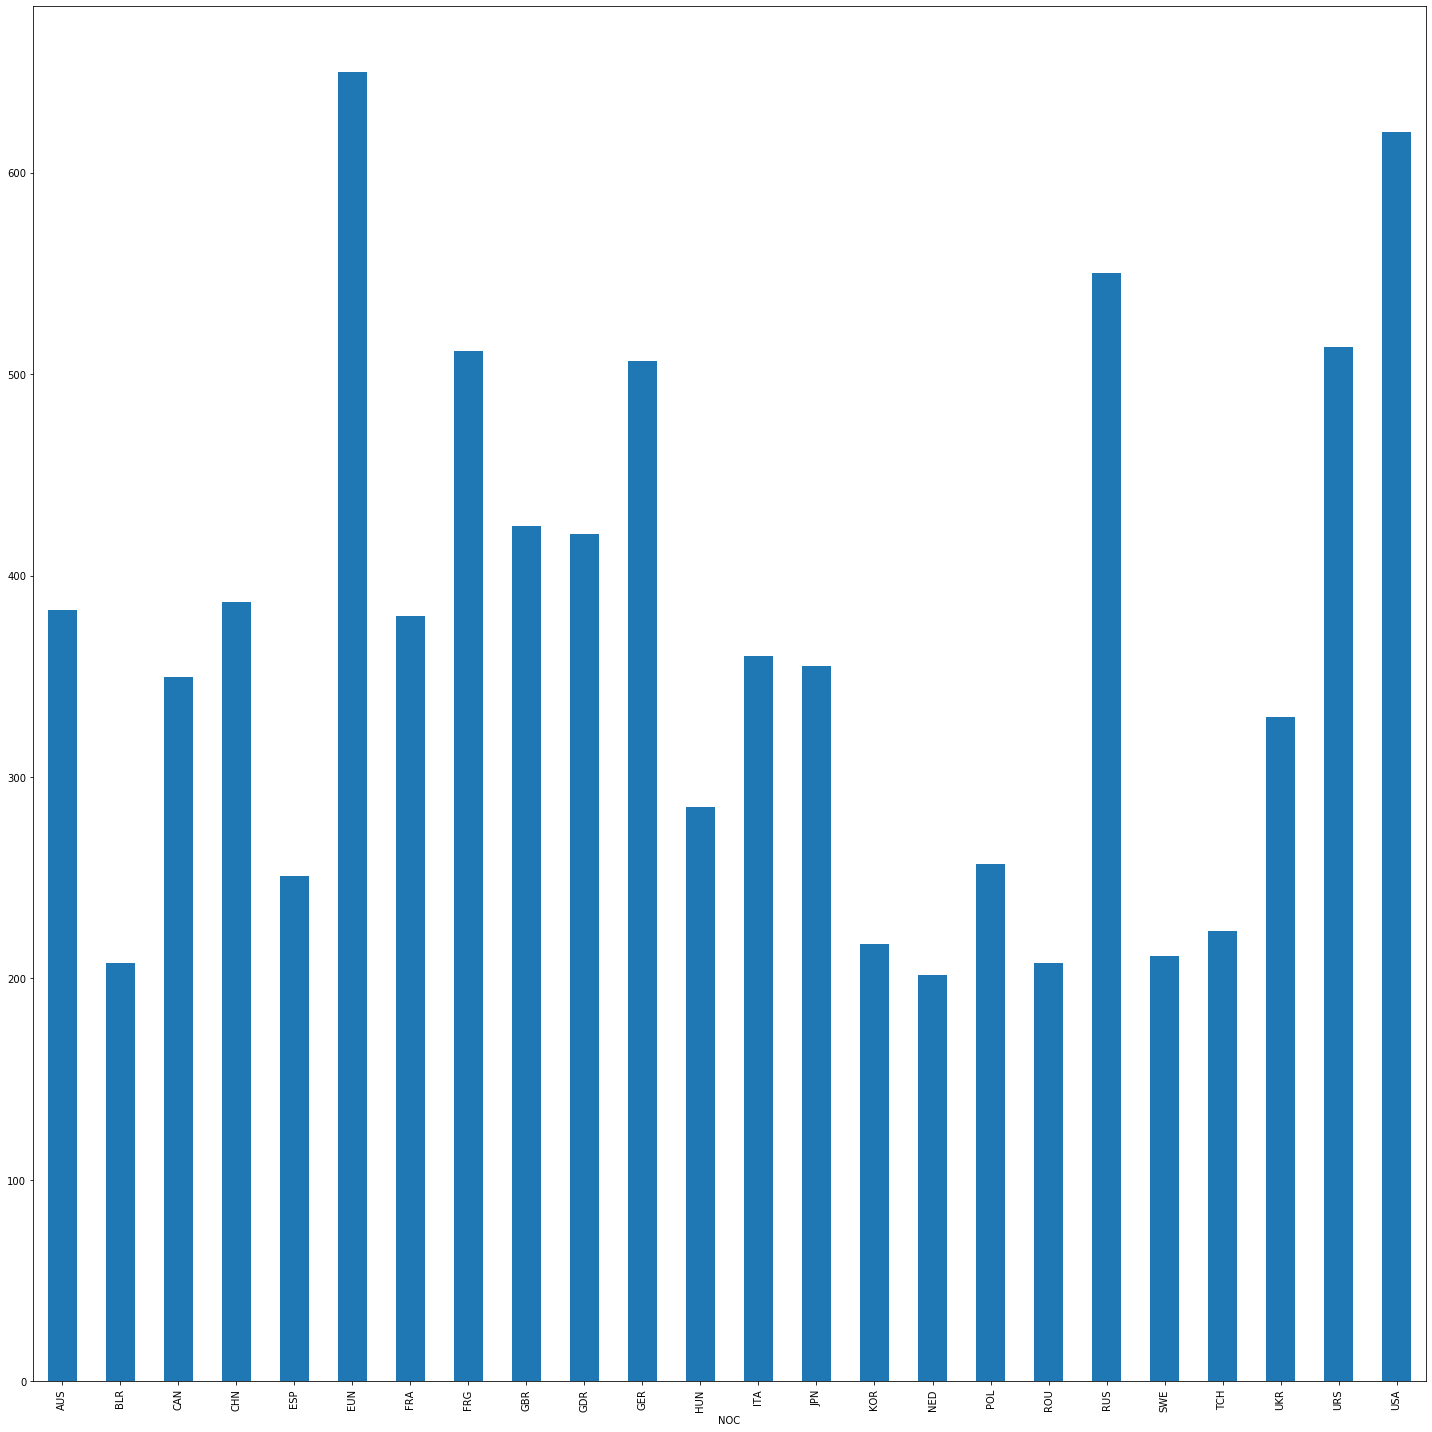

In [8]:
# Make a simple bar chart of mean team size for large teams.
plt.figure(figsize = (20, 20))
summer_mean_team_size[summer_mean_team_size > 200].plot(kind="bar")
plt.tight_layout()

### Question: Can we predict which countries will lead the medal count in 2020?

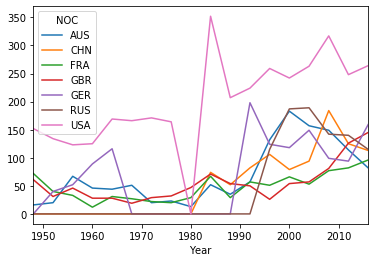

In [14]:
# Create a dataframe counting medals for each country for every summer games since WWII.
summer_post_war_medal_count_df = summer_post_war_df.groupby(["NOC", "Year"])["Medal"].count()
summer_post_war_medal_count_df = summer_post_war_medal_count_df.unstack()
summer_post_war_medal_count_df = summer_post_war_medal_count_df.fillna(value=0)
summer_post_war_medal_count_df = summer_post_war_medal_count_df.transpose()

# Filter for only those countries that won many medals in 2016.
summer_high_winners_df = summer_post_war_medal_count_df
for noc in summer_high_winners_df.columns:
    if summer_high_winners_df.loc[2016, noc] < 75:
        summer_high_winners_df = summer_high_winners_df.drop(columns = noc)
    else:
        pass 


# Create a plot of several prominent countries over the post WWII games.
summer_high_winners_df.plot(kind="line")
plt.savefig("resources/high_winners.png")

### Key Question: Is there a host country advantage?

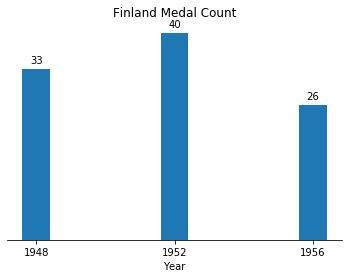

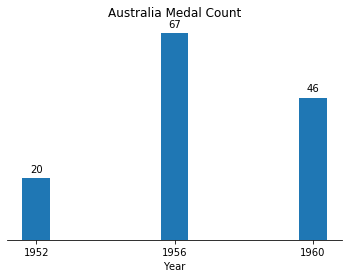

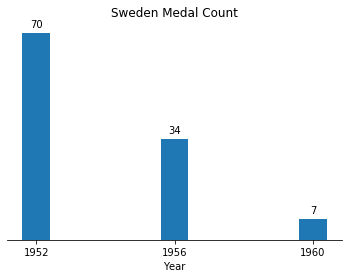

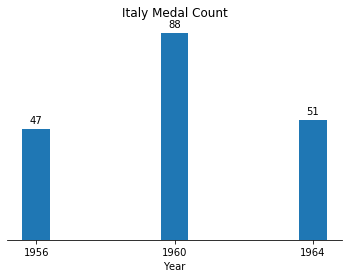

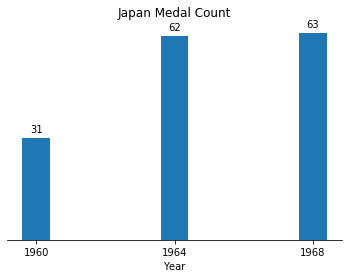

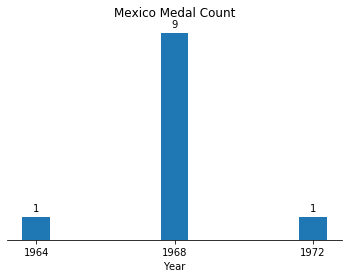

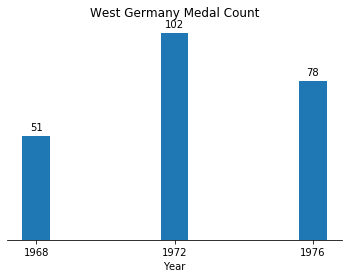

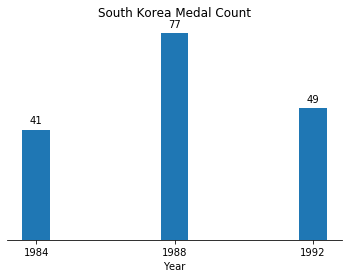

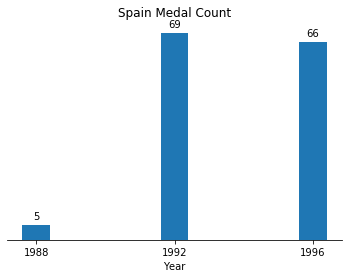

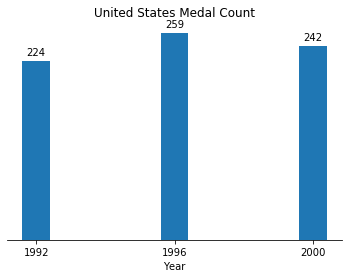

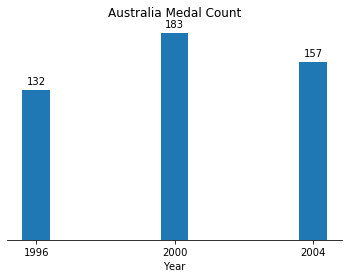

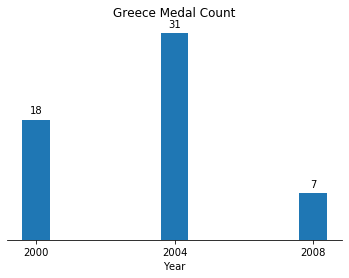

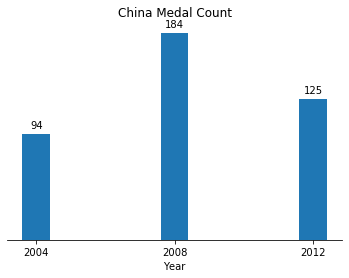

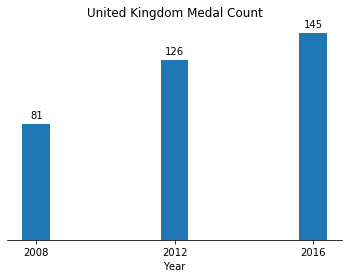

In [10]:
# Try to compare host games to games just before and after and make bar charts of medal counts.

# Build a dictionary of country to NOC codes for host countries for post war summer games.
country_to_noc = {"United Kingdom":"GBR",
                  "Finland":"FIN",
                  "Sweden":"SWE",
                  "Australia":"AUS",
                  "Italy":"ITA",
                  "Japan":"JPN",
                  "Mexico":"MEX",
                  "West Germany":"FRG",
                  "Canada":"CAN",
                  "Soviet Union":"URS",
                  "United States":"USA",
                  "South Korea":"KOR",
                  "Spain":"ESP",
                  "Greece":"GRE",
                  "China":"CHN",
                  "Brazil":"BRA",
                 }

# Create a list of post war summer games for which we will run a comparison.
years = [1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012]

# PROBLEM SEARCHING FOR DATA FOR HOST YEARS, TRY A DIFFERENT STRATEGY
# Loop through the list of years and create a bar chart of the medal count for the host country in the games before, during, and
# after hosting.
# for year in years:
#     for row_index, row_data in host_cities_df.iterrows():
#         if (row_data["Year"] == year) & ((row_data["Summer (Olympiad)"] == "") |\
#                                          (row_data["Summer (Olympiad)"] == "XXX") |\
#                                          (row_data["Summer (Olympiad)"] == "XXIV") |\
#                                          (row_data["Summer (Olympiad)"] == "XXVIII") |\
#                                          (row_data["Summer (Olympiad)"] == "XXVII") |\
#                                          (row_data["Summer (Olympiad)"] == "XXVI")
#                                         ):
#             host_noc = country_to_noc[row_data["Country"]]
#             axes[years.index(year) // 4, years.index(year) % 4].bar(x=[year - 4,
#                                                                        year,
#                                                                        year + 4
#                                                                       ],
#                                                                     height=[summer_post_war_medal_count_df.loc[year - 4,
#                                                                                                                host_noc
#                                                                                                               ],
#                                                                             summer_post_war_medal_count_df.loc[year,
#                                                                                                                host_noc
#                                                                                                               ],
#                                                                             summer_post_war_medal_count_df.loc[year + 4,
#                                                                                                                host_noc
#                                                                                                               ]
#                                                                            ]
#                                                                    )
#         else:
#             pass

# Define a function that will produce a subplot for an input year and host country at specified place in the figure array.
def host_bar(year, host_country):
    """
    Input: Row where the data is located, year to consider, country that host those summer olympic games, coordinates where the 
    bar chart is to appear in the figure array.
    Output: A bar chart showing the medal count for the host country during the input summer games, as well as the games before
    and after positioned at the input coordinates in the figure array. Return None.
    """
    # Find the host NOC in order to get medal count.
    host_noc = country_to_noc[host_country]
    
    # Create the bar chart.
    fig, ax = plt.subplots()
    ax.bar(x=[year - 4,
              year,
              year + 4
             ],
           height=[summer_post_war_medal_count_df.loc[year - 4,
                                                      host_noc
                                                     ],
                   summer_post_war_medal_count_df.loc[year,
                                                      host_noc
                                                     ],
                   summer_post_war_medal_count_df.loc[year + 4,
                                                      host_noc
                                                     ]
                  ]
          )
    
    # Set a title to be the host country
    ax.set_title(f"{host_country} Medal Count")
    
    # Set the xticks
    plt.xticks([year - 4,
               year,
               year + 4
              ],
               [year - 4,
               year,
               year + 4
              ]
             )
    
    # Set the x axis label, remove the yticks, vertical sides of the box, and top of the box.
    ax.set_xlabel("Year")
    plt.tick_params(axis="y",
                    which="both",
                    left=False,
                    labelleft=False
                   )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Label the bars with their height.
    # Source: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 4
        
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(label,
                    (x_value, y_value),
                    xytext=(0, space),
                    textcoords="offset points",
                    ha='center',
                    va=va)              
    
    # Display the plot
    plt.show()
    
    return None

# Create the bar charts one at a time.
host_bar(1952, "Finland")
host_bar(1956, "Australia")
host_bar(1956, "Sweden")
host_bar(1960, "Italy")
host_bar(1964, "Japan")
host_bar(1968, "Mexico")
host_bar(1972, "West Germany")

# Exclude years that include nations which boycotted a games.
# host_bar(1976, "Canada")
# host_bar(1980, "Soviet Union")
# host_bar(1984, "United States")

host_bar(1988, "South Korea")
host_bar(1992, "Spain")
host_bar(1996, "United States")
host_bar(2000, "Australia")
host_bar(2004, "Greece")
host_bar(2008, "China")
host_bar(2012, "United Kingdom")

In [11]:
# Is the difference between host years and non host years statistically significant?

# Create lists of medal counts for when countries host and when they do not.
host_medals = [40, 67, 34, 88, 62, 9, 102, 77, 69, 259, 183, 31, 184, 126]
non_host_medals = [33, 26, 20, 46, 70, 7, 47, 51, 31, 63, 1, 1, 51, 78, 41, 49, 5, 66, 224, 242, 132, 157, 18, 7, 94, 125, 81, 145]

# Test our samples for normal distribution.
stat_host, p_host = sts.normaltest(host_medals)
stat_non_host, p_non_host = sts.normaltest(non_host_medals)

print(p_host, p_non_host)

0.11555229079834613 0.004761707616367709


c:\users\tristan\anaconda\anaconda3\envs\pythondata\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


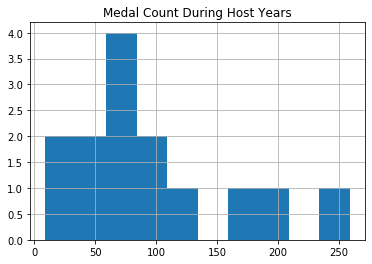

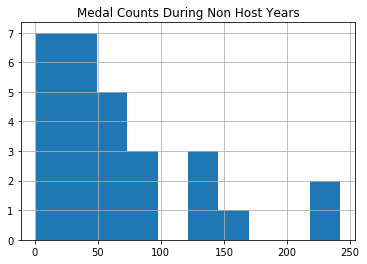

In [12]:
# Create data frames of medal counts for host countries during host years and non host years.
host_medals_df = pd.DataFrame({"Medal Count During Host Years":host_medals
                              },
                              index = ["Finland",
                                       "Australia",
                                       "Sweden",
                                       "Italy",
                                       "Japan",
                                       "Mexico",
                                       "West Germany",
                                       "South Korea",
                                       "Spain",
                                       "United States",
                                       "Australia",
                                       "Greece",
                                       "China",
                                       "United Kingdom"
                                      ]
                             )

non_host_medals_df = pd.DataFrame({"Medal Counts During Non Host Years":non_host_medals
                              },
                              index = ["Finland",
                                       "Finland",
                                       "Australia",
                                       "Australia",
                                       "Sweden",
                                       "Sweden",
                                       "Italy",
                                       "Italy",
                                       "Japan",
                                       "Japan",
                                       "Mexico",
                                       "Mexico",
                                       "West Germany",
                                       "West Germany",
                                       "South Korea",
                                       "South Korea",
                                       "Spain",
                                       "Spain",
                                       "United States",
                                       "United States",
                                       "Australia",
                                       "Australia",
                                       "Greece",
                                       "Greece",
                                       "China",
                                       "China",
                                       "United Kingdom",
                                       "United Kingdom"
                                      ]
                             )

# Examine the distribution of medals with histograms. Save the figures for inclusion in the report.
host_medals_df.hist("Medal Count During Host Years")
plt.savefig("resources/host_medals_hist.png")
non_host_medals_df.hist("Medal Counts During Non Host Years")
plt.savefig("resources/non_host_medals_hist.png")

In [13]:
# The data appears to be skewed. We will calculate the average of the "bordering" non-host years and use a Wilcoxon test.

# Create a list of the mean of "bordering" non-host years.
av_non_host = [29.5, 33, 38.5, 49, 47, 1, 64.5, 45, 35.5, 233, 144.5, 12.5, 109.5, 113]

# Compute the difference between host years and non-host years.
diff_medals = [host_medals[i] - av_non_host[i] for i in range(len(av_non_host))]

# Run a Wilcoxon test on the difference between hosting medals and non-hosting medals.
stat, p = sts.wilcoxon(diff_medals)

stat, p

(1.0, 0.0012250235420688657)

* Based on a confidence interval of 0.05, we reject the null hypothesis that there is no difference in medal count between host years and non-host years.